<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/survival-analysis-alalen-model-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 5. Aalen's Additive Regression Model

## Introduction

The **Aalen's Additive regression model**, also known as the **Aalen’s additive hazards model**, is a statistical technique used in survival analysis. Unlike the more commonly used Cox Proportional Hazards model, which assumes a multiplicative relationship between the covariates and the hazard function, the Aalen model assumes an **additive** relationship between the covariaAalen Model in R
This tutorial is mostly used two R packages {survival} and {ggsurvfit}. Additionally we will use {ggfortify} which offers fortify and autoplot functions to allow automatic ggplot2 to visualize Kaplan-Meier plots.

tes and the hazard function. This model is particularly useful when the proportional hazards assumption of the Cox model does not hold, meaning that the effects of covariates on survival are not constant over time.

***Key Concepts of the Aalen Model***:

1.  **Additive Hazards**:
    -   In the Aalen model, the hazard at time $t$ is expressed as the sum of contributions from the covariates. The contribution of each covariate to the hazard function can change over time, making the model more flexible than the Cox model.
    -   The hazard function $h(t)$is expressed as an additive function of the covariates.
2.  **Time-Varying Coefficients**:
    -   The Aalen model allows for **time-varying effects** of the covariates, meaning that the effect of each covariate on the hazard can change over time. This is an important feature that differentiates it from other survival models like the Cox model, which assumes constant covariate effects.
3.  **No Proportional Hazards Assumption**:
    -   The model does not rely on the proportional hazards assumption, making it more appropriate for situations where the covariates' effects vary over time.
4.  **Interpretation**:
    -   The coefficients in the Aalen model represent the **incremental effects** of the covariates on the hazard function at each time point. These coefficients are not hazard ratios, as in the Cox model, but are rather additive effects.

***The Aalen Model Equation***:

The Aalen additive hazards model can be written as:

$$ h(t|X) = h_0(t) + \beta_1(t) X_1 + \beta_2(t) X_2 + \dots + \beta_p(t) X_p $$

Where:

-   $h(t|X)$ is the hazard at time $t$ for an individual with covariates $X_1, X_2, \dots, X_p$.
-   $h_0(t)$ is the baseline hazard function at time $t$.
-   $\beta_1(t), \beta_2(t), \dots, \beta_p(t)$ are the **time-varying** coefficients for each covariate $X_1, X_2, \dots, X_p$, indicating how the effect of each covariate on the hazard changes over time.

***Key Differences Between the Aalen Model and Cox Model***:

1.  **Additive vs. Multiplicative**:
    -   **Aalen model**: Assumes an **additive** effect of covariates on the hazard function.
    -   **Cox model**: Assumes a **multiplicative** effect of covariates on the hazard function.
2.  **Time-Varying Coefficients**:
    -   **Aalen model**: Allows for time-varying effects of covariates (i.e., the effect of a covariate can change over time).
    -   **Cox model**: Assumes the effects of covariates (hazard ratios) are **constant over time**.
3.  **Proportional Hazards Assumption**:
    -   **Aalen model**: Does **not** require the proportional hazards assumption.
    -   **Cox model**: Requires the proportional hazards assumption (the effect of covariates on the hazard is proportional over time).
4.  **Interpretation**:
    -   **Aalen model**: Coefficients represent **additive** contributions to the hazard rate, which vary over time.
    -   **Cox model**: Coefficients represent **multiplicative** hazard ratios, which are assumed to be constant over time.

***Applications of the Aalen Model***:

1.  **Time-Varying Effects**:
    -   The Aalen model is particularly useful when the effects of covariates are expected to change over time. For example, in medical research, the effect of a treatment may change as patients progress through different stages of their disease.
2.  **Exploratory Analysis**:
    -   It is often used for exploratory analysis to check whether the proportional hazards assumption holds. If the covariate effects appear to be time-varying in the Aalen model, it suggests that the Cox model may not be appropriate.
3.  **Flexible Survival Modeling**:
    -   The model provides more flexibility than the Cox model, especially when the effects of covariates are not constant over time.

***Advantages of the Aalen Model***:

1.  **Flexibility**:
    -   The model allows for **time-varying covariate effects**, making it useful when the proportional hazards assumption does not hold.
2.  **Exploratory Tool**:
    -   It can be used to explore time-varying effects of covariates and identify whether a simpler Cox model is appropriate.
3.  **No Proportional Hazards Assumption**:
    -   It does not require the proportional hazards assumption, making it more robust in certain settings.

***Limitations***:

1.  **Interpretability**:
    -   The coefficients are harder to interpret compared to hazard ratios in the Cox model, especially because they are time-varying and represent additive effects.
2.  **Less Popular**:
    -   The Aalen model is less commonly used than the Cox model, which means there is less software support and fewer resources available for interpreting results.
3.  **Less Efficient**:
    -   If the true underlying model is multiplicative (as assumed by the Cox model), the Aalen model may be less efficient in estimating the effects of covariates.







## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314953 sha256=6a8ad8d795230190f1d5d16708e8068e901c4a1630f29326b87b4b1b377fc7ef
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Required R Packages



In [ ]:
pkg <- c(
		 'tidyverse',
		 'report',
		 'performance',
		 'gtsummary',
		 'MASS',
		 'epiDisplay',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'riskRegression'
		 )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
devtools::install_github("zabore/condsurv", lib='drive/My Drive/R/')

## Fit a Aalen Model

Let's now go through the **manual calculation** of Aalen's Additive Hazard Model using the **simulated veteran dataset**.  We'll calculate the necessary steps for fitting the model without relying on any pre-built R package functions.

We will:

1. Simulate the veteran-like dataset.
2. Estimate the time-varying coefficients.
3. Calculate the cumulative coefficients.
4. Compute the cumulative hazard.
5. Plot the cumulative coefficients.

### Creat a dataset

In [ ]:
%%R
set.seed(123)

# Number of patients
n <- 100

# Simulated dataset similar to 'veteran'
simulated_veteran <- data.frame(
  time = rexp(n, rate = 0.1),  # Survival times from an exponential distribution
  status = sample(0:1, n, replace = TRUE, prob = c(0.4, 0.6)),  # Event (1) or censoring (0)
  trt = sample(1:2, n, replace = TRUE),  # Treatment group (1 = standard, 2 = test)
  age = rnorm(n, mean = 60, sd = 10),  # Age (mean = 60)
  celltype = sample(1:4, n, replace = TRUE),  # Cell type (categorical: 1 = squamous, etc.)
  karno = rnorm(n, mean = 70, sd = 10),  # Karnofsky score
  diagtime = rnorm(n, mean = 5, sd = 2),  # Time since diagnosis in months
  prior = sample(0:10, n, replace = TRUE)  # Number of prior therapies
)

head(simulated_veteran)

        time status trt      age celltype    karno  diagtime prior
1  8.4345726      0   1 71.09920        4 56.35963 6.4254067     7
2  5.7661027      0   2 60.84737        1 67.99219 7.1695502     0
3 13.2905487      0   1 67.54054        1 78.65779 0.5500246     1
4  0.3157736      0   2 55.00708        4 68.98117 7.4713869    10
5  0.5621098      1   1 62.14445        3 76.24187 2.5179110     4
6  3.1650122      1   1 56.75314        4 79.59005 5.9095385     4


This generates 100 observations with the following columns:
- `time`: Survival or censoring time.
- `status`: Event indicator (1 = event occurred, 0 = censored).
- `trt`: Treatment group (1 or 2).
- `age`, `karno`, `diagtime`, and `prior`: Covariates for analysis.

###  Estimate Time-Varying Coefficients

At each event time, we estimate the time-varying coefficients \( \beta_j(t) \) using least squares regression. The formula for the coefficient estimates is:

$$ \beta(t) = \left( X(t)^T X(t) \right)^{-1} X(t)^T d(t) $$

Here's the code to estimate the coefficients manually at each event time:

In [ ]:
%%R
# Load MASS package
library(MASS)

estimate_aalen_coefficients <- function(time, status, X) {
  unique_times <- sort(unique(time[status == 1]))  # Only event times
  betas <- matrix(0, nrow = length(unique_times), ncol = ncol(X))  # To store coefficients

  for (i in seq_along(unique_times)) {
    t <- unique_times[i]

    # Risk set at time t (those who haven't had the event yet)
    risk_set <- which(time >= t)

    if (length(risk_set) > 1) {
      X_risk <- X[risk_set, , drop = FALSE]
      y_risk <- status[risk_set]

      # Use Moore-Penrose generalized inverse
      betas[i, ] <- ginv(t(X_risk) %*% X_risk) %*% t(X_risk) %*% y_risk
    }
  }

  return(list(betas = betas, unique_times = unique_times))
}

# Prepare the design matrix X (excluding the time and status columns)
X <- as.matrix(simulated_veteran[, c("trt", "age", "karno", "diagtime", "prior")])

# Try running it again with generalized inverse
aalen_results <- estimate_aalen_coefficients(simulated_veteran$time, simulated_veteran$status, X)

# Extract the results
betas <- aalen_results$betas
unique_times <- aalen_results$unique_times

# Convert to a data frame for easier plotting
betas_df <- as.data.frame(betas)
betas_df$time <- unique_times

# Print the estimated time-varying coefficients
head(betas_df)

          V1          V2          V3          V4         V5      time
1 0.05873544 0.006259231 0.003374983 -0.02853867 0.01010860 0.2915345
2 0.06448842 0.005070569 0.003717400 -0.02450852 0.01455075 0.3176774
3 0.05570305 0.005388397 0.003540725 -0.02264181 0.01307701 0.4208829
4 0.04973973 0.005907833 0.003585505 -0.02391420 0.00942069 0.5621098
5 0.05503656 0.005802184 0.003284665 -0.02139353 0.01007015 0.6737589
6 0.04506262 0.005664981 0.003475025 -0.01908471 0.01108399 0.9863089


###  Calculate Cumulative Coefficients

After obtaining the time-varying coefficients at each event time, we calculate the cumulative coefficients by summing them over time:

$$ \hat{\beta_j}(t) = \sum_{t_i \leq t} \hat{\beta_j}(t_i) $$

In [ ]:
%%R
# Calculate cumulative coefficients
cumulative_betas <- apply(betas, 2, cumsum)

# Convert to a data frame for easier plotting
cumulative_betas_df <- as.data.frame(cumulative_betas)
cumulative_betas_df$time <- unique_times

# Print the cumulative coefficients
head(cumulative_betas_df)

          V1          V2          V3          V4         V5      time
1 0.05873544 0.006259231 0.003374983 -0.02853867 0.01010860 0.2915345
2 0.12322386 0.011329800 0.007092383 -0.05304719 0.02465934 0.3176774
3 0.17892691 0.016718197 0.010633109 -0.07568900 0.03773635 0.4208829
4 0.22866664 0.022626031 0.014218614 -0.09960320 0.04715704 0.5621098
5 0.28370320 0.028428214 0.017503279 -0.12099673 0.05722719 0.6737589
6 0.32876583 0.034093196 0.020978304 -0.14008144 0.06831118 0.9863089


### Compute the Cumulative Hazard

The cumulative hazard is the integral (sum) of the hazard function over time, where the hazard function at any time is the sum of the covariates weighted by their time-varying coefficients:

$$ \Lambda(t \mid X) = \sum_{t_i \leq t} h(t_i \mid X) $$

For simplicity, we'll assume that we only calculate this for the baseline hazard.

### Plot Cumulative Coefficients

Finally, we plot the cumulative coefficients for each covariate to see how their effects change over time.

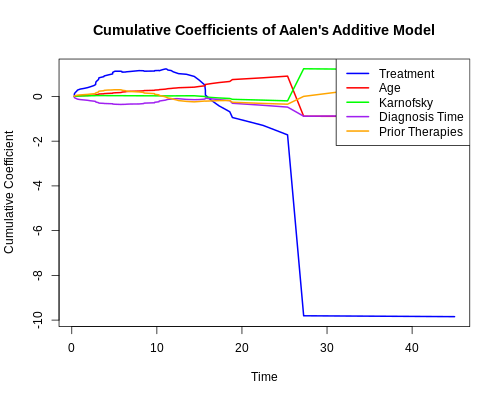

In [ ]:
%%R -w 500 -h 400 -u px
# Plot cumulative coefficients for each covariate
plot(cumulative_betas_df$time, cumulative_betas_df$V1, type = "l", col = "blue",
     xlab = "Time", ylab = "Cumulative Coefficient", lwd = 2, main = "Cumulative Coefficients of Aalen's Additive Model")
lines(cumulative_betas_df$time, cumulative_betas_df$V2, col = "red", lwd = 2)
lines(cumulative_betas_df$time, cumulative_betas_df$V3, col = "green", lwd = 2)
lines(cumulative_betas_df$time, cumulative_betas_df$V4, col = "purple", lwd = 2)
lines(cumulative_betas_df$time, cumulative_betas_df$V5, col = "orange", lwd = 2)

# Add a legend
legend("topright", legend = c("Treatment", "Age", "Karnofsky", "Diagnosis Time", "Prior Therapies"),
       col = c("blue", "red", "green", "purple", "orange"), lwd = 2)

## Aalen Model with  R

This tutorial is mostly used two R packages [{survival}](https://cran.r-project.org/web/packages/survival/index.html), and [{timereg}](https://cran.r-project.org/web/packages/timereg/index.html/).


In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(gtsummary)
library(report)
library(performance)
library(MASS)
library(epiDisplay)
library(survival)
library(survminer)
library(ggsurvfit)
library(tidycmprsk)
library(condsurv)
library(ggfortify)
library(timereg)
library(cmprsk)
library(riskRegression)


### Load R packages

### Data

In this example, we will perform a **Aalen additive hazards model** using the `veteran` dataset from the {survival} package.

In [ ]:
%%R
data(veteran)
glimpse(veteran)

Rows: 137
Columns: 8
$ trt      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ celltype <fct> squamous, squamous, squamous, squamous, squamous, squamous, s…
$ time     <dbl> 72, 411, 228, 126, 118, 10, 82, 110, 314, 100, 42, 8, 144, 25…
$ status   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0…
$ karno    <dbl> 60, 70, 60, 60, 70, 20, 40, 80, 50, 70, 60, 40, 30, 80, 70, 6…
$ diagtime <dbl> 7, 5, 3, 9, 11, 5, 10, 29, 18, 6, 4, 58, 4, 9, 11, 3, 9, 2, 4…
$ age      <dbl> 69, 64, 38, 63, 65, 49, 69, 68, 43, 70, 81, 63, 63, 52, 48, 6…
$ prior    <dbl> 0, 10, 0, 10, 10, 0, 10, 0, 0, 0, 0, 10, 0, 10, 10, 0, 0, 0, …


The dataset contains information such as:

-   `time`: Survival time in days.

-   `status`: Censoring indicator (1 = death, 0 = censored).

-   `trt`: Treatment group (1 = standard treatment, 2 = test treatment).

-   `age`: Age of the patient.

-   `celltype`: Cell type of lung cancer.

-   `karno`: Karnofsky performance score (higher is better).

-   `diagtime`: Time since diagnosis in months.

-   `prior`: Number of prior treatments.

### Fit a Aalen Model using {survival} package

`aareg()` function of {survival} package using the survival time (`time`), censoring indicator (`status)`, and several covariates such as `age`, `trt`, `celltype,` and `karno`,



In [ ]:
%%R -h 550 -w 500 -u px
fit.aamodel <-aareg(Surv(time, status) ~  age + trt + celltype + karno ,
                 data = veteran)
summary(fit.aamodel)

                      slope      coef se(coef)      z        p
Intercept          0.067600  3.74e-02 1.06e-02  3.540 4.00e-04
age               -0.000249 -6.86e-05 1.28e-04 -0.537 5.91e-01
trt                0.006840  2.54e-03 2.62e-03  0.971 3.32e-01
celltypesmallcell  0.015100  6.64e-03 3.40e-03  1.950 5.07e-02
celltypeadeno      0.023500  1.04e-02 4.18e-03  2.490 1.27e-02
celltypelarge     -0.000918  3.87e-04 2.85e-03  0.136 8.92e-01
karno             -0.001250 -4.54e-04 8.81e-05 -5.160 2.52e-07

Chisq=40.27 on 6 df, p=4.02e-07; test weights=aalen


The summary of the model shows the time-varying estimates for each covariate (e.g., age, treatment, cell type, and Karnofsky score).

-   If the estimates for a covariate remain roughly constant over time, it suggests that its effect on the hazard is constant.

-   If the estimates for a covariate change over time, it indicates that the covariate has a time-varying effect on survival.

We can visualize how the cumulative regression coefficients (i.e., the effect of each covariate) change over time by plotting the model.

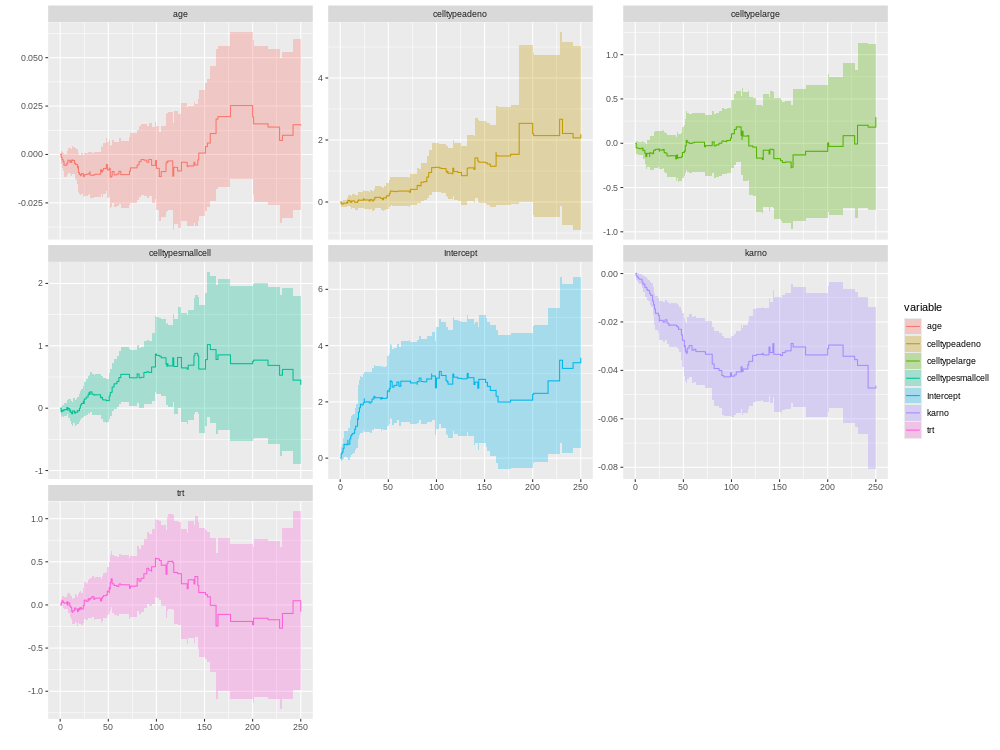

In [ ]:
%%R -h 750 -w 1000 -u px
autoplot(fit.aamodel)


The plot shows how the cumulative effect of each covariate on the hazard function changes over time. This allows us to see whether the covariate effects are constant or time-varying.

-   **Age**: If the cumulative coefficient for `age` increases over time, it suggests that older patients have a progressively higher risk of death as time goes on.

-   **Treatment (trt)**: The plot for `trt` will show how the effect of the treatment group changes over time. If the test treatment has a decreasing or flat cumulative coefficient, it suggests a positive effect on survival.

-   **Karnofsky score (karno)**: If the cumulative coefficient for `karno` decreases, it suggests that patients with a higher Karnofsky score (better performance status) have a reduced risk of death.



### Fit a Aalen Model using {timereg} package

`aalen()` function of {timereg} package fits both the additive hazards model of **Aalen and the semi-parametric additive hazards model** of McKeague and Sasieni. Estimates are un-weighted. Time dependent variables and counting process data (multiple events per subject) are possible.

`max.time`: end of observation period where estimates are computed. Estimates thus computed from \[start.time, max.time\]. Default is max of data.

`n.sim`: number of simulations in resampling.

In [ ]:
%%R
# Fit the Aalen additive hazards model
fit.aalenreg <- aalen(Surv(time, status) ~ age + trt + celltype + karno,
                      data = veteran,
                      max.time=30, #
                      n.sim=1000)

# Print the summary of the model
summary(fit.aalenreg)

Additive Aalen Model 

Test for nonparametric terms 

Test for non-significant effects 
                  Supremum-test of significance p-value H_0: B(t)=0
(Intercept)                                4.42               0.001
age                                        2.26               0.167
trt                                        1.76               0.450
celltypesmallcell                          1.66               0.441
celltypeadeno                              1.60               0.470
celltypelarge                              2.22               0.146
karno                                      5.31               0.000

Test for time invariant effects 
                        Kolmogorov-Smirnov test p-value H_0:constant effect
(Intercept)                             0.50300                       0.199
age                                     0.00423                       0.411
trt                                     0.11400                       0.157
celltypesmallcell             

To visualize how the effect of each covariate changes over time, you can plot the cumulative regression coefficients.

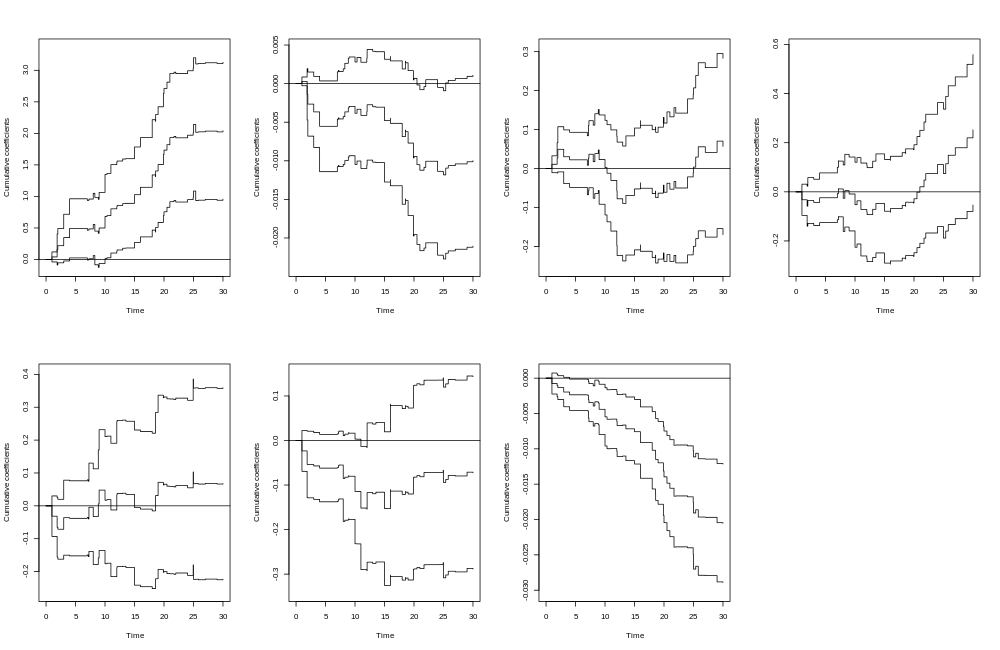

In [ ]:
%%R -h 650 -w 1000 -u px
par(mfrow=c(2,4))
plot(fit.aalenreg, main="Aalen Model")


### Interpretation of the Results

-   **Karnofsky Score (`karno`)**: A negative time-varying coefficient indicates that better performance status (higher Karnofsky score) is associated with a lower hazard of death. The cumulative coefficient shows how this effect accumulates over time.

-   **Treatment (`trt`)**: A positive or negative time-varying coefficient for the treatment group indicates whether the test treatment increases or decreases the hazard of death compared to the standard treatment.

-   **Time-Varying Effects**: If the coefficients for certain covariates change over time, it means their effects on survival are not constant, which might suggest that the effect of these covariates varies depending on how long a patient has survived.

## Summary and Conclusions

The **Aalen additive hazards model** is a flexible tool in survival analysis, allowing for **time-varying effects** of covariates on the hazard function. It provides an alternative to the Cox model, particularly when the assumption of proportional hazards does not hold. While the model’s interpretability may be more complex than the Cox model, it is a valuable tool for exploring time-dependent relationships in survival data.


## Summary and Conclusion:

In this example, we used **Landmark analysis** to evaluate the effect of **Karnofsky performance score** and **treatment** on survival after 90 days. This method is helpful when dealing with time-dependent covariates and intermediate events, allowing you to assess how these factors influence survival beyond a certain time point. By focusing on patients still at risk at the landmark time, the analysis can provide more accurate insights into the post-landmark survival.


## References

## References

1.  Aalen, O.O. (1989). A linear regression model for the analysis of life times. Statistics in Medicine, 8:907-925.
2.  Aalen, O.O (1993). Further results on the non-parametric linear model in survival analysis. Statistics in Medicine. 12:1569-1588.
3.  [Survival Analysis with R](https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/)
